# RoBERT vs XGBoost vs SVM vs Logistic Regression Comparison

This notebook compares the performance of four sentiment analysis models on the LaRoSeDa dataset:
1. **RoBERT** (Romanian BERT) - Transformer-based model (v1)
2. **XGBoost** - Gradient boosting with IGWO feature selection, no stemming
3. **SVM** - Support Vector Machine with full TF-IDF bigram features, no IGWO, no stemming (v2)
4. **Logistic Regression** - Linear model with full TF-IDF bigram features, no IGWO, no stemming

## Comparison Aspects
- Accuracy and other metrics
- Confusion matrices
- Per-class performance
- Model characteristics
- Speed and deployment considerations

In [12]:
import sys
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

%matplotlib inline

## 1. Load Results

Load metrics from all three models.

In [13]:
# Define experiment paths
robert_dir = Path("../../ml-models/robert/v1")
xgboost_dir = Path("../results/experiments/xgb_igwo_and_no_stemmatization")
svm_dir = Path("../results/experiments/svm_no_igwo_bigrams")  # Updated to v2 with bigrams
lr_dir = Path("../results/experiments/lr_no_igwo")  # Logistic Regression

print(f"RoBERT experiment: {robert_dir}")
print(f"XGBoost experiment: {xgboost_dir}")
print(f"SVM experiment: {svm_dir}")
print(f"Logistic Regression experiment: {lr_dir}")

RoBERT experiment: ..\..\ml-models\robert\v1
XGBoost experiment: ..\results\experiments\xgb_igwo_and_no_stemmatization
SVM experiment: ..\results\experiments\svm_no_igwo_bigrams
Logistic Regression experiment: ..\results\experiments\lr_no_igwo


In [14]:
# Load metrics
models = {}

if robert_dir.exists() and (robert_dir / 'metrics.json').exists():
    with open(robert_dir / 'metrics.json') as f:
        models['RoBERT'] = json.load(f)
    print("✓ Loaded RoBERT metrics")
else:
    print("✗ RoBERT metrics not found")
    models['RoBERT'] = None

if xgboost_dir.exists() and (xgboost_dir / 'metrics.json').exists():
    with open(xgboost_dir / 'metrics.json') as f:
        models['XGBoost'] = json.load(f)
    print("✓ Loaded XGBoost metrics")
else:
    print("✗ XGBoost metrics not found")
    models['XGBoost'] = None

if svm_dir.exists() and (svm_dir / 'metrics.json').exists():
    with open(svm_dir / 'metrics.json') as f:
        models['SVM'] = json.load(f)
    print("✓ Loaded SVM metrics")
else:
    print("✗ SVM metrics not found")
    models['SVM'] = None

if lr_dir.exists() and (lr_dir / 'metrics.json').exists():
    with open(lr_dir / 'metrics.json') as f:
        models['Logistic Regression'] = json.load(f)
    print("✓ Loaded Logistic Regression metrics")
else:
    print("✗ Logistic Regression metrics not found")
    models['Logistic Regression'] = None

✓ Loaded RoBERT metrics
✓ Loaded XGBoost metrics
✓ Loaded SVM metrics
✓ Loaded Logistic Regression metrics


## 2. Metrics Comparison

Compare key performance metrics between all four models.

In [15]:
# Create comparison dataframe
if all(models.values()):
    comparison_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
        'RoBERT': [
            models['RoBERT'].get('accuracy', 0),
            models['RoBERT'].get('precision_macro', 0),
            models['RoBERT'].get('recall_macro', 0),
            models['RoBERT'].get('f1_macro', 0)
        ],
        'XGBoost': [
            models['XGBoost'].get('accuracy', 0),
            models['XGBoost'].get('precision_macro', 0),
            models['XGBoost'].get('recall_macro', 0),
            models['XGBoost'].get('f1_macro', 0)
        ],
        'SVM': [
            models['SVM'].get('accuracy', 0),
            models['SVM'].get('precision_macro', 0),
            models['SVM'].get('recall_macro', 0),
            models['SVM'].get('f1_macro', 0)
        ],
        'Logistic Regression': [
            models['Logistic Regression'].get('accuracy', 0),
            models['Logistic Regression'].get('precision_macro', 0),
            models['Logistic Regression'].get('recall_macro', 0),
            models['Logistic Regression'].get('f1_macro', 0)
        ]
    })
    
    print("\n📊 METRICS COMPARISON")
    print("=" * 120)
    print(comparison_df.to_string(index=False))
    print("=" * 120)
    
    # Highlight winner for each metric
    for idx, row in comparison_df.iterrows():
        metric = row['Metric']
        scores = {
            'RoBERT': row['RoBERT'], 
            'XGBoost': row['XGBoost'], 
            'SVM': row['SVM'],
            'Logistic Regression': row['Logistic Regression']
        }
        winner = max(scores, key=scores.get)
        print(f"\n🏆 {metric}: {winner} wins with {scores[winner]:.4f}")
else:
    print("⚠ Cannot compare - missing metrics")


📊 METRICS COMPARISON
           Metric   RoBERT  XGBoost      SVM  Logistic Regression
         Accuracy 0.983333 0.946667 0.964333             0.964333
Precision (Macro) 0.983337 0.946717 0.964343             0.964350
   Recall (Macro) 0.983333 0.946667 0.964333             0.964333
 F1 Score (Macro) 0.983333 0.946665 0.964333             0.964333

🏆 Accuracy: RoBERT wins with 0.9833

🏆 Precision (Macro): RoBERT wins with 0.9833

🏆 Recall (Macro): RoBERT wins with 0.9833

🏆 F1 Score (Macro): RoBERT wins with 0.9833


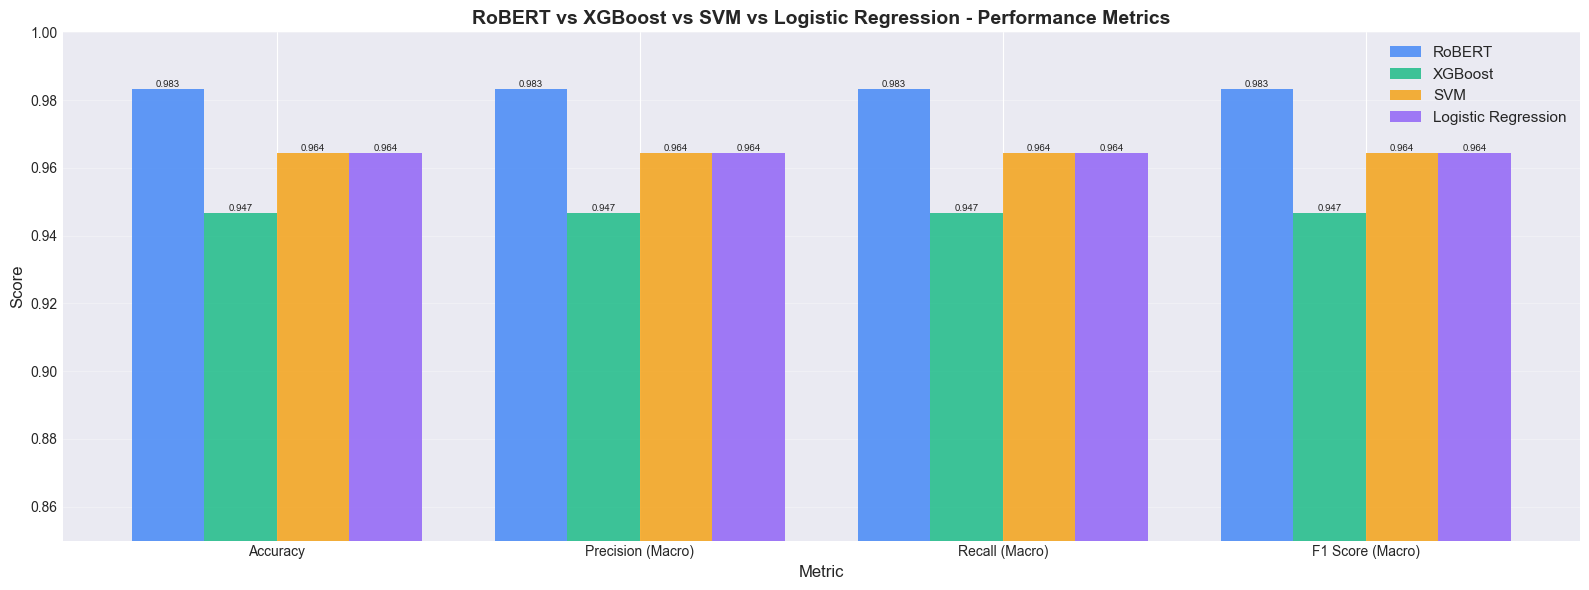

In [16]:
# Visualize metrics comparison
if all(models.values()):
    fig, ax = plt.subplots(figsize=(16, 6))
    
    x = np.arange(len(comparison_df))
    width = 0.2
    
    bars1 = ax.bar(x - 1.5*width, comparison_df['RoBERT'], width, label='RoBERT', alpha=0.8, color='#3b82f6')
    bars2 = ax.bar(x - 0.5*width, comparison_df['XGBoost'], width, label='XGBoost', alpha=0.8, color='#10b981')
    bars3 = ax.bar(x + 0.5*width, comparison_df['SVM'], width, label='SVM', alpha=0.8, color='#f59e0b')
    bars4 = ax.bar(x + 1.5*width, comparison_df['Logistic Regression'], width, label='Logistic Regression', alpha=0.8, color='#8b5cf6')
    
    ax.set_xlabel('Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title('RoBERT vs XGBoost vs SVM vs Logistic Regression - Performance Metrics', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Metric'])
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0.85, 1.0])
    
    # Add value labels on bars
    for bars in [bars1, bars2, bars3, bars4]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom', fontsize=7)
    
    plt.tight_layout()
    plt.show()

## 3. Confusion Matrix Comparison

Visualize confusion matrices for all four models.

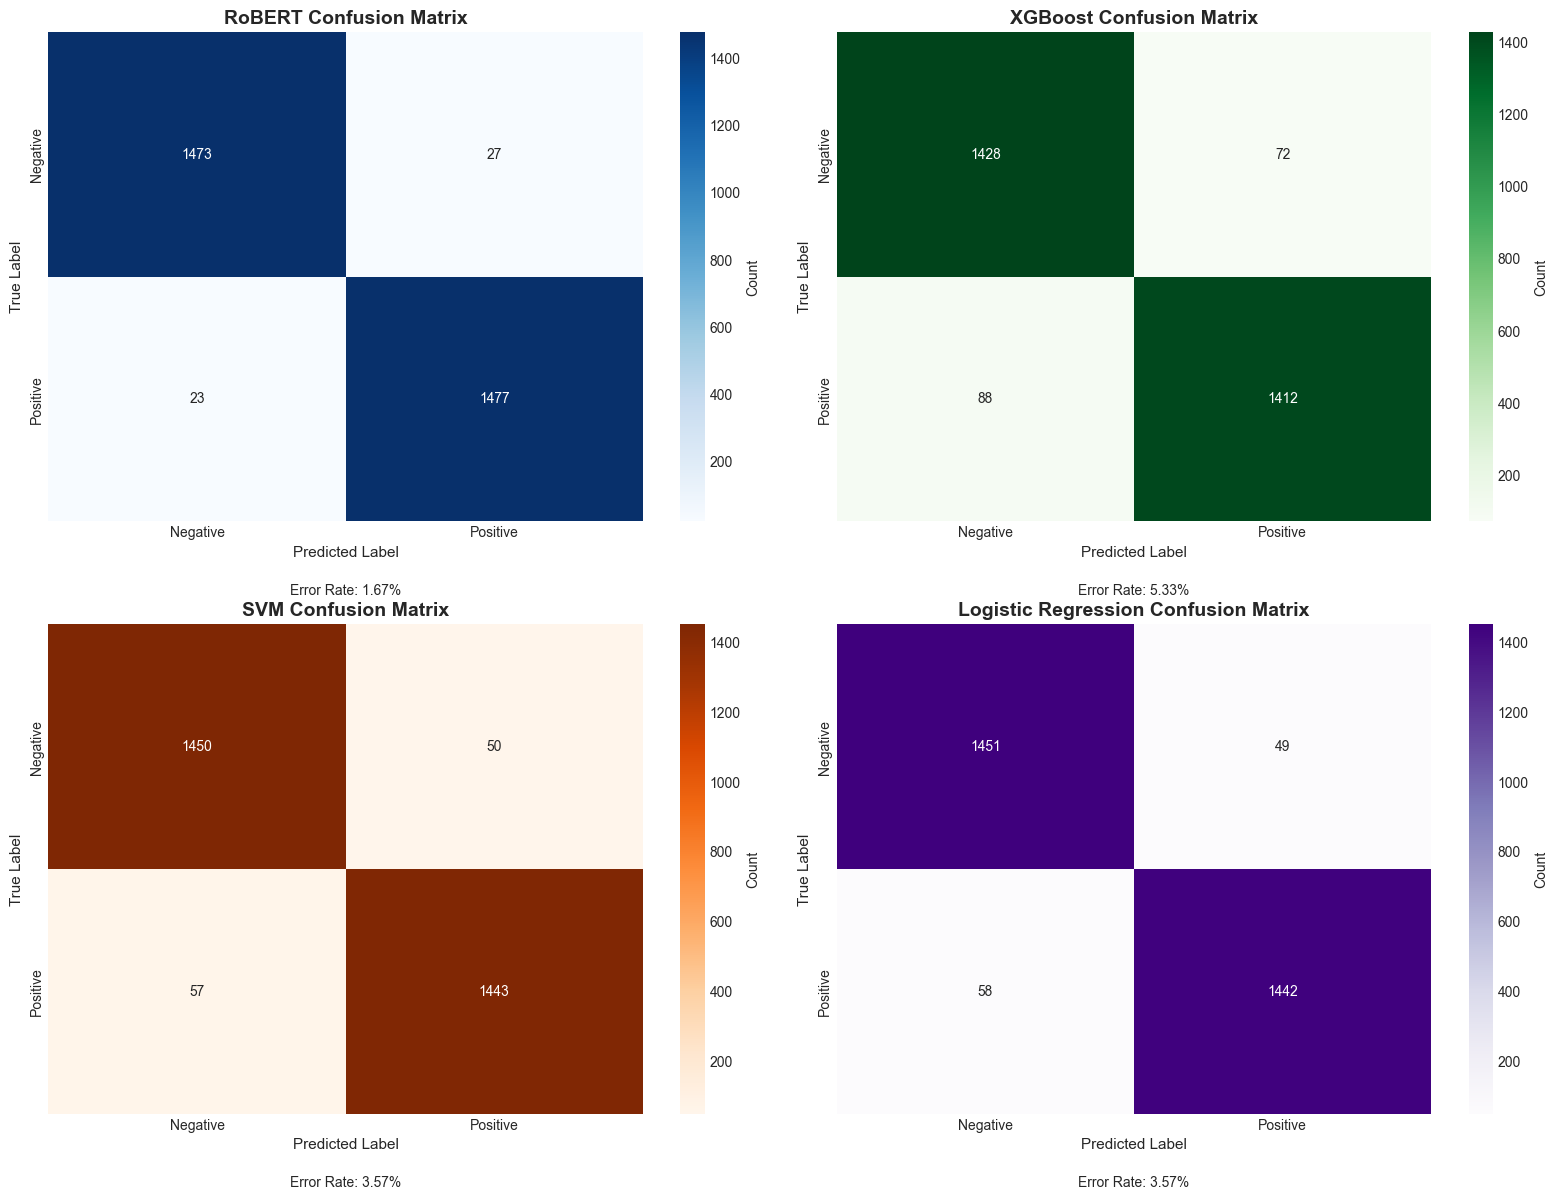

In [17]:
# Plot confusion matrices side by side
if all(models.values()):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    class_names = ['Negative', 'Positive']
    colors = ['Blues', 'Greens', 'Oranges', 'Purples']
    model_names = ['RoBERT', 'XGBoost', 'SVM', 'Logistic Regression']
    
    for idx, (model_name, color) in enumerate(zip(model_names, colors)):
        cm = np.array(models[model_name].get('confusion_matrix', [[0, 0], [0, 0]]))
        sns.heatmap(cm, annot=True, fmt='d', cmap=color,
                    xticklabels=class_names, yticklabels=class_names,
                    ax=axes[idx], cbar_kws={'label': 'Count'})
        axes[idx].set_title(f'{model_name} Confusion Matrix', fontsize=14, fontweight='bold')
        axes[idx].set_ylabel('True Label', fontsize=11)
        axes[idx].set_xlabel('Predicted Label', fontsize=11)
        
        # Add error rate
        error_rate = (cm[0, 1] + cm[1, 0]) / cm.sum()
        axes[idx].text(0.5, -0.15, f'Error Rate: {error_rate:.2%}',
                      ha='center', transform=axes[idx].transAxes, fontsize=10)
    
    plt.tight_layout()
    plt.show()

## 5. Model Characteristics Comparison

Compare model architecture, size, and computational requirements.

In [18]:
# Create characteristics comparison
characteristics = pd.DataFrame({
    'Characteristic': [
        'Model Type',
        'Parameters',
        'Preprocessing',
        'Feature Engineering',
        'Feature Selection',
        'Training Time (approx)',
        'Inference Speed',
        'Model Size',
        'GPU Required',
        'Language Specific'
    ],
    'RoBERT': [
        'Transformer (BERT)',
        '~124M parameters',
        'Minimal (tokenization)',
        'Automatic (learned embeddings)',
        'N/A',
        '1-3 hours',
        '~20ms per review',
        '~500MB',
        'Recommended',
        'Yes (Romanian BERT)'
    ],
    'XGBoost': [
        'Gradient Boosting',
        '~1M parameters',
        'Extensive (lemmatization)',
        'Manual (TF-IDF)',
        'IGWO (1000 features)',
        '20-40 minutes',
        '~5ms per review',
        '~15MB',
        'No',
        'Language-agnostic'
    ],
    'SVM': [
        'Support Vector Machine',
        '~5K parameters',
        'Extensive (lemmatization)',
        'Manual (TF-IDF bigrams)',
        'None (16,320 features)',
        '<5 minutes',
        '<1ms per review',
        '~12MB',
        'No',
        'Language-agnostic'
    ],
    'Logistic Regression': [
        'Linear Classifier',
        '~16K parameters',
        'Extensive (lemmatization)',
        'Manual (TF-IDF bigrams)',
        'None (16,320 features)',
        '<1 minute',
        '<1ms per review',
        '~1MB',
        'No',
        'Language-agnostic'
    ]
})

print("\n⚙️ MODEL CHARACTERISTICS COMPARISON")
print("=" * 140)
print(characteristics.to_string(index=False))
print("=" * 140)


⚙️ MODEL CHARACTERISTICS COMPARISON
        Characteristic                         RoBERT                   XGBoost                       SVM       Logistic Regression
            Model Type             Transformer (BERT)         Gradient Boosting    Support Vector Machine         Linear Classifier
            Parameters               ~124M parameters            ~1M parameters            ~5K parameters           ~16K parameters
         Preprocessing         Minimal (tokenization) Extensive (lemmatization) Extensive (lemmatization) Extensive (lemmatization)
   Feature Engineering Automatic (learned embeddings)           Manual (TF-IDF)   Manual (TF-IDF bigrams)   Manual (TF-IDF bigrams)
     Feature Selection                            N/A      IGWO (1000 features)    None (16,320 features)    None (16,320 features)
Training Time (approx)                      1-3 hours             20-40 minutes                <5 minutes                 <1 minute
       Inference Speed               ~2

## 7. Summary and Recommendations

Provide final recommendations based on the comparison.

In [ ]:
if all(models.values()):
    accuracies = {
        'RoBERT': models['RoBERT']['accuracy'],
        'XGBoost': models['XGBoost']['accuracy'],
        'SVM': models['SVM']['accuracy'],
        'Logistic Regression': models['Logistic Regression']['accuracy']
    }
    
    best_model = max(accuracies, key=accuracies.get)
    
    print("\n" + "="*100)
    print("📝 SUMMARY AND RECOMMENDATIONS")
    print("="*100)
    
    print(f"\n📊 Final Accuracy Scores:")
    for model, acc in sorted(accuracies.items(), key=lambda x: x[1], reverse=True):
        winner_mark = "🏆" if model == best_model else "  "
        print(f"  {winner_mark} {model:22s}: {acc:.4f} ({acc*100:.2f}%)")
    
    print("\n" + "="*100)
    print("📈 KEY FINDINGS")
    print("="*100)
    
    # Compare models pairwise with best classical ML model
    robert_vs_lr = accuracies['RoBERT'] - accuracies['Logistic Regression']
    robert_vs_xgb = accuracies['RoBERT'] - accuracies['XGBoost']
    robert_vs_svm = accuracies['RoBERT'] - accuracies['SVM']
    lr_vs_xgb = accuracies['Logistic Regression'] - accuracies['XGBoost']
    lr_vs_svm = accuracies['Logistic Regression'] - accuracies['SVM']
    svm_vs_xgb = accuracies['SVM'] - accuracies['XGBoost']
    
    print(f"\n1. RoBERT vs Logistic Regression: {robert_vs_lr:+.2%} accuracy difference")
    print(f"2. RoBERT vs XGBoost: {robert_vs_xgb:+.2%} accuracy difference")
    print(f"3. RoBERT vs SVM: {robert_vs_svm:+.2%} accuracy difference")
    print(f"4. Logistic Regression vs XGBoost: {lr_vs_xgb:+.2%} accuracy difference")
    print(f"5. Logistic Regression vs SVM: {lr_vs_svm:+.2%} accuracy difference")
    print(f"6. SVM vs XGBoost: {svm_vs_xgb:+.2%} accuracy difference")
    
    # Identify best classical ML model
    classical_models = {k: v for k, v in accuracies.items() if k != 'RoBERT'}
    best_classical = max(classical_models, key=classical_models.get)
    print(f"\n🎯 Best Classical ML Model: {best_classical} ({classical_models[best_classical]:.4f})")
    
    print("\n" + "="*100)
    print("💡 USE CASE RECOMMENDATIONS")
    print("="*100)
    
    print("\n✅ Use RoBERT when:")
    print("  • Maximum accuracy is critical ")
    print("  • GPU resources available for inference")
    print("  • Romanian language nuances are important")
    print("  • Inference latency <50ms is acceptable")
    print("  • Budget allows for higher compute costs")
    
    print("\n✅ Use Logistic Regression when:")
    print("  • Ultra-fast inference critical (<1ms)")
    print("  • No GPU available")
    print("  • Fastest training time (<1 minute)")
    
    print("\n✅ Use XGBoost when:")
    print("  • Feature selection with IGWO is beneficial")
    print("  • Non-linear patterns in data")
    print("  • Moderate model size acceptable (~15MB)")
    print("  • GPU not available or too expensive")
    
    print("\n✅ Use SVM when:")
    print("  • Similar performance to LR but with different approach")
    print("  • Kernel methods might be explored later")
    print("  • Fast inference needed (<1ms)")
    print("  • Baseline comparison model")
    
else:
    print("⚠ Cannot provide recommendations - missing metrics")


📝 SUMMARY AND RECOMMENDATIONS

📊 Final Accuracy Scores:
  🏆 RoBERT                : 0.9833 (98.33%)
     SVM                   : 0.9643 (96.43%)
     Logistic Regression   : 0.9643 (96.43%)
     XGBoost               : 0.9467 (94.67%)

📈 KEY FINDINGS

1. RoBERT vs Logistic Regression: +1.90% accuracy difference
2. RoBERT vs XGBoost: +3.67% accuracy difference
3. RoBERT vs SVM: +1.90% accuracy difference
4. Logistic Regression vs XGBoost: +1.77% accuracy difference
5. Logistic Regression vs SVM: +0.00% accuracy difference
6. SVM vs XGBoost: +1.77% accuracy difference

🎯 Best Classical ML Model: SVM (0.9643)

💡 USE CASE RECOMMENDATIONS

✅ Use RoBERT when:
  • Maximum accuracy is critical 
  • GPU resources available for inference
  • Romanian language nuances are important
  • Inference latency <50ms is acceptable
  • Budget allows for higher compute costs

✅ Use Logistic Regression when:
  • Best classical ML accuracy needed (96.4%)
  • Ultra-fast inference critical (<1ms)
  • Minimal 